In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

orders = pd.read_csv("C:/Users/acer/Downloads/archive/olist_orders_dataset.csv")

orders.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [2]:
orders.isnull().sum()


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [3]:
orders.fillna(method='ffill', inplace = True)


C:\Users\acer\AppData\Local\Temp\ipykernel_11144\1293233583.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  orders.fillna(method='ffill', inplace = True)


In [4]:
orders.isnull().sum()


order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99441 non-null  object
 5   order_delivered_carrier_date   99441 non-null  object
 6   order_delivered_customer_date  99441 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [6]:
orders.duplicated().sum()

np.int64(0)

In [7]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [8]:
orders = orders.convert_dtypes()      
orders.dtypes

order_id                         string[python]
customer_id                      string[python]
order_status                     string[python]
order_purchase_timestamp         string[python]
order_approved_at                string[python]
order_delivered_carrier_date     string[python]
order_delivered_customer_date    string[python]
order_estimated_delivery_date    string[python]
dtype: object

In [9]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders.dtypes

order_id                         string[python]
customer_id                      string[python]
order_status                     string[python]
order_purchase_timestamp         datetime64[ns]
order_approved_at                string[python]
order_delivered_carrier_date     string[python]
order_delivered_customer_date    string[python]
order_estimated_delivery_date    string[python]
dtype: object

In [10]:
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders.dtypes

order_id                         string[python]
customer_id                      string[python]
order_status                     string[python]
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [11]:
orders.rename(columns={'order_purchase_timestamp': 'order_purchase', 'order_delivered_carrier_date':'carrier_date', 'order_delivered_customer_date' :'customer_date', 'order_estimated_delivery_date' : 'delivery_date'  }, inplace=True)
orders.head(2)

,order_id,customer_id,order_status,order_purchase,order_approved_at,carrier_date,customer_date,delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13


In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           99441 non-null  string        
 1   customer_id        99441 non-null  string        
 2   order_status       99441 non-null  string        
 3   order_purchase     99441 non-null  datetime64[ns]
 4   order_approved_at  99441 non-null  datetime64[ns]
 5   carrier_date       99441 non-null  datetime64[ns]
 6   customer_date      99441 non-null  datetime64[ns]
 7   delivery_date      99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), string(3)
memory usage: 6.1 MB


In [13]:
customers = pd.read_csv("C:/Users/acer/Downloads/archive/olist_customers_dataset.csv")

customers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [14]:
customers.isna().sum()


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [15]:
customers.duplicated().sum()

np.int64(0)

In [16]:
customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [17]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [18]:
customers= customers.convert_dtypes()   
customers.dtypes# Converts to best possible dtypes


customer_id                 string[python]
customer_unique_id          string[python]
customer_zip_code_prefix             Int64
customer_city               string[python]
customer_state              string[python]
dtype: object

In [19]:
customers.drop('customer_zip_code_prefix', axis=1, inplace=True)
customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state'], dtype='object')

In [21]:
merged = pd.merge(orders, customers, on='customer_id', how='left')
merged

,order_id,customer_id,order_status,order_purchase,order_approved_at,carrier_date,customer_date,delivery_date,customer_unique_id,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ


In [23]:
merged.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            99441 non-null  string        
 1   customer_id         99441 non-null  string        
 2   order_status        99441 non-null  string        
 3   order_purchase      99441 non-null  datetime64[ns]
 4   order_approved_at   99441 non-null  datetime64[ns]
 5   carrier_date        99441 non-null  datetime64[ns]
 6   customer_date       99441 non-null  datetime64[ns]
 7   delivery_date       99441 non-null  datetime64[ns]
 8   customer_unique_id  99441 non-null  string        
 9   customer_city       99441 non-null  string        
 10  customer_state      99441 non-null  string        
dtypes: datetime64[ns](5), string(6)
memory usage: 8.3 MB


In [24]:
merged.describe()

,order_purchase,order_approved_at,carrier_date,customer_date,delivery_date
count,99441,99441,99441,99441,99441
mean,2017-12-31 08:43:12.776581120,2017-12-31 20:23:34.460584704,2018-01-05 01:00:33.728884480,2018-01-14 15:01:35.991602944,2018-01-24 03:08:37.730111232
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,2017-09-12 14:46:19,2017-09-13 03:15:36,2017-09-18 13:50:17,2017-09-26 00:48:43,2017-10-03 00:00:00
50%,2018-01-18 23:04:36,2018-01-19 13:35:58,2018-01-24 17:49:18,2018-02-02 20:08:54,2018-02-15 00:00:00
75%,2018-05-04 15:42:16,2018-05-04 21:35:13,2018-05-08 13:51:00,2018-05-15 23:21:53,2018-05-25 00:00:00
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [25]:
merged.isnull().sum()

order_id              0
customer_id           0
order_status          0
order_purchase        0
order_approved_at     0
carrier_date          0
customer_date         0
delivery_date         0
customer_unique_id    0
customer_city         0
customer_state        0
dtype: int64

In [26]:
merged['order_status'].value_counts()


order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: Int64

In [27]:
merged['customer_state'].value_counts()


customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: Int64

In [29]:
merged['delivery_days'] = (merged['delivery_date'] - merged['order_purchase']).dt.days
merged

,order_id,customer_id,order_status,order_purchase,order_approved_at,carrier_date,customer_date,delivery_date,customer_unique_id,customer_city,customer_state,delivery_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,15
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,BA,19
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,26
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,26
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,12
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,SP,18
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,praia grande,SP,23
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA,30
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ,37


C:\Users\acer\AppData\Local\Temp\ipykernel_11144\118466085.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='order_status', data=merged, palette='viridis')


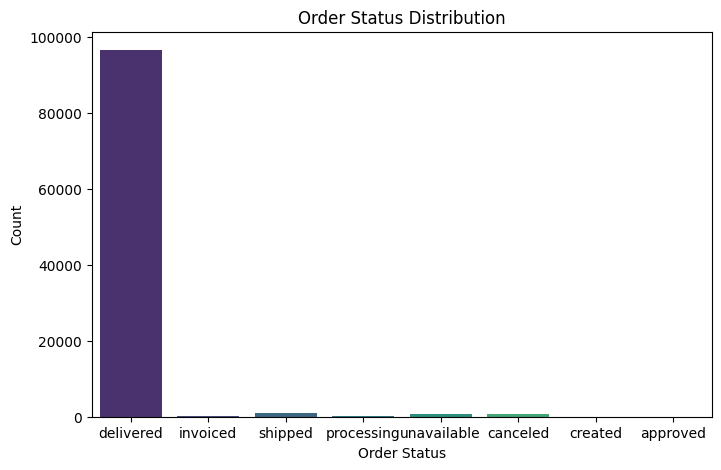

In [30]:
# Q1. Which order statuses occur most frequently?

plt.figure(figsize=(8,5))
sns.countplot(x='order_status', data=merged, palette='viridis')
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.show()


#Insight: Shows how many orders are delivered, canceled, or pending.


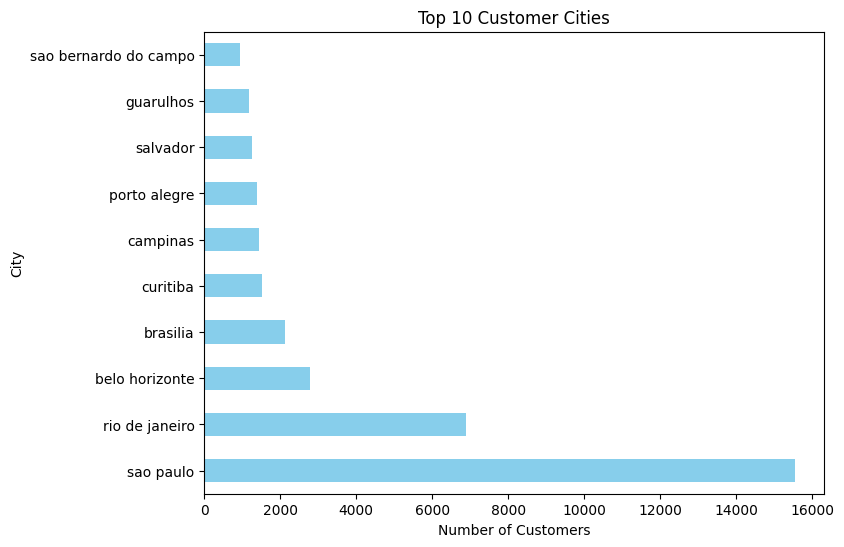

In [31]:
# Q2. Which cities have the highest number of customers?

top_cities = merged['customer_city'].value_counts().head(10)

plt.figure(figsize=(8,6))
top_cities.plot(kind='barh', color='skyblue')
plt.title('Top 10 Customer Cities')
plt.xlabel('Number of Customers')
plt.ylabel('City')
plt.show()

# Insight: Reveals top regions where most customers are located.

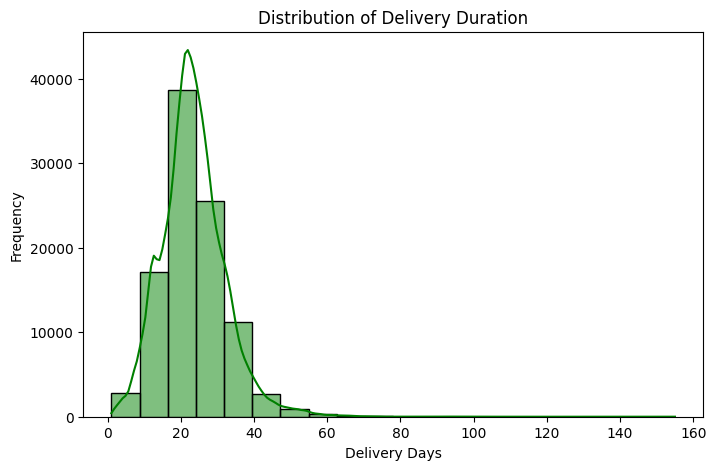

In [33]:
# Q3. What’s the distribution of delivery days?

plt.figure(figsize=(8,5))
sns.histplot(merged['delivery_days'], bins=20, kde=True, color='green')
plt.title('Distribution of Delivery Duration')
plt.xlabel('Delivery Days')
plt.ylabel('Frequency')
plt.show()

#Insight: Understands average delivery time and outliers (slow deliveries).

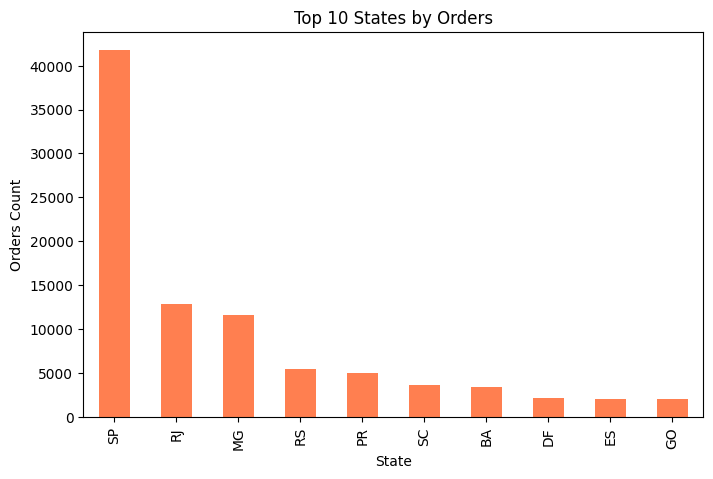

In [34]:
# Q4. What are the top 10 states with maximum orders?

top_states = merged['customer_state'].value_counts().head(10)

plt.figure(figsize=(8,5))
top_states.plot(kind='bar', color='coral')
plt.title('Top 10 States by Orders')
plt.xlabel('State')
plt.ylabel('Orders Count')
plt.show()

# Insight: Identifies top-performing states.

In [35]:
# Q5. Is there a relationship between delivery days and order status?

plt.figure(figsize=(8,5))
sns.boxplot(x='order_status', y='delivery_days', data=merged, palette='coolwarm')
plt.title('Delivery Days by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Delivery Days')
plt.show()

#Insight: Detects if canceled or delayed orders take longer time.


NameError: name 'df' is not defined

<Figure size 800x500 with 0 Axes>

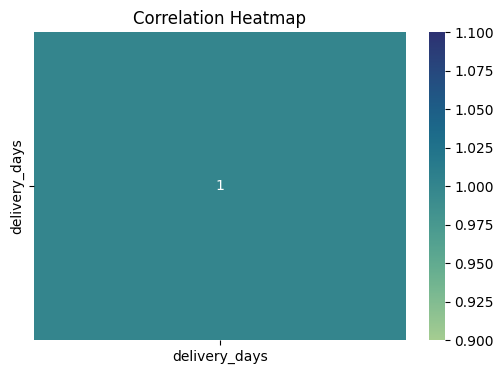

In [37]:
# Q6. Correlation between numeric features?

plt.figure(figsize=(6,4))
sns.heatmap(merged.corr(numeric_only=True), annot=True, cmap='crest')
plt.title('Correlation Heatmap')
plt.show()

# Insight: Shows relationships between numerical variables.

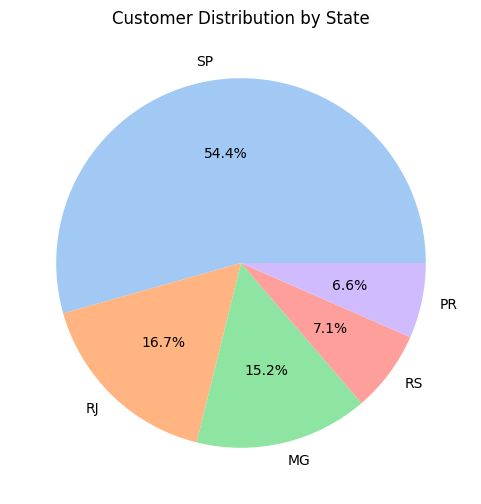

In [40]:
# Q8. What’s the distribution of customers by state?



state_count = merged['customer_state'].value_counts().head(5)
plt.figure(figsize=(6,6))
plt.pie(state_count, labels=state_count.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Customer Distribution by State')
plt.show()


# Insight: Shows top 5 states dominating the customer base.

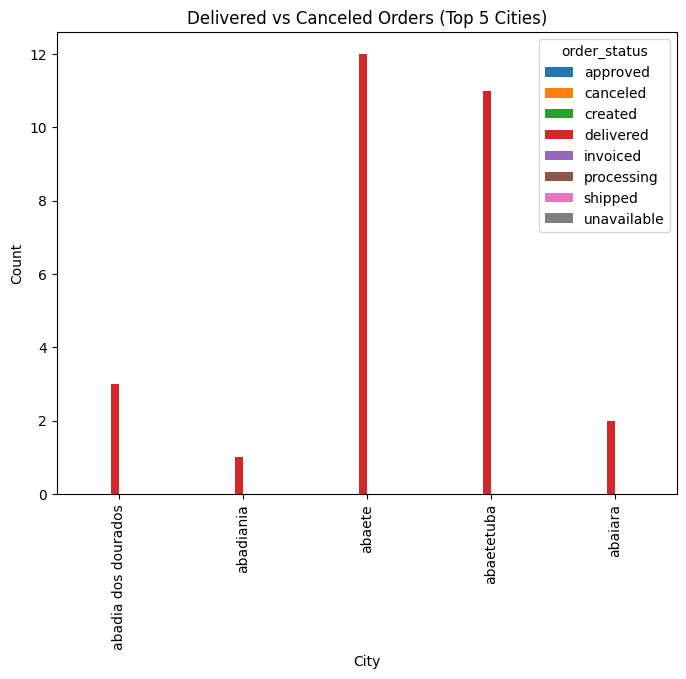

In [39]:
# Q9. Compare delivered vs canceled orders by top cities



city_status = merged.groupby(['customer_city', 'order_status']).size().unstack().fillna(0)
city_status = city_status.head(5)

city_status.plot(kind='bar', figsize=(8,6))
plt.title('Delivered vs Canceled Orders (Top 5 Cities)')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()


# Insight: Detects cities with higher cancellation rates.

C:\Users\acer\AppData\Local\Temp\ipykernel_11144\323955612.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fastest_cities.values, y=fastest_cities.index, palette='mako')


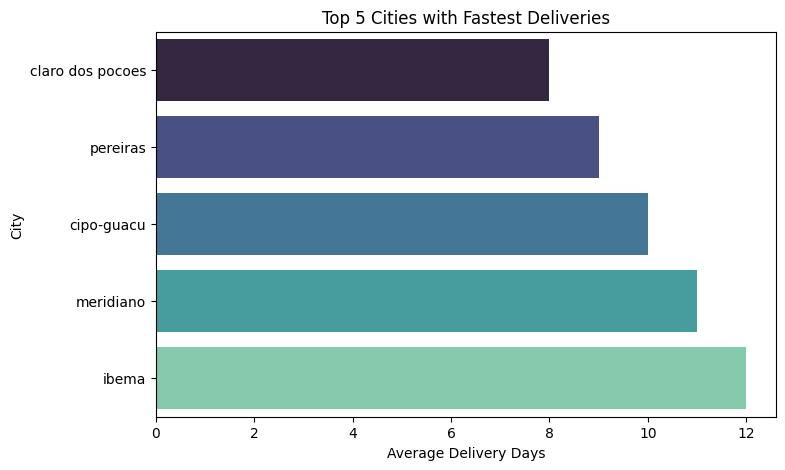

In [41]:
#  Which cities deliver the fastest?


fastest_cities = merged.groupby('customer_city')['delivery_days'].mean().sort_values().head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=fastest_cities.values, y=fastest_cities.index, palette='mako')
plt.title('Top 5 Cities with Fastest Deliveries')
plt.xlabel('Average Delivery Days')
plt.ylabel('City')
plt.show()

# Insight: Helps logistics identify best-performing delivery locations.